In [12]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

### Введение в машинное обучение

https://stepik.org/lesson/808033/step/1?unit=811278

In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
columns = ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
df = pd.DataFrame(data=data, columns=columns)
df['target'] = raw_df.values[1::2, 2]

###### Признаки

1. Определения

Признаки — это то, с помощью чего мы описываем наши объекты. Они бывают нескольких типов:

- бинарные $D \subseteq \{0,1\}.$ Например, есть кредит у клиента или нет, красный цвет машины или нет;
- вещественные $D\subseteq R $ Например, цена дома, возраст студента
- категориальные. Цвет стола (белый, черный, коричневый), пол (мужской, женский);
- порядковые (когда мы можем сравнить значения между собой). Оценка за предмет, звание в армии.

2. Обработка признаков

Например, в алгоритмах Linear Regression, KNN, K-means масштаб признаков очень влияет на результат работы алгоритма. Если признаки не приведены к одному масштабу, то возникают проблемы с поиском оптимальных параметров, так как данные модели чувствительны к масштабу признаков.

Для части признаков необходимо сделать преобразование из категориальных в бинарный вид, так как многие модели не могут обрабатывать такой тип данных.


###### Масштабирование признаков

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- Стандартизация

In [31]:
from sklearn.preprocessing import StandardScaler

# определим экземпляр класса StandardScaler
sc = StandardScaler()
df_scalar = sc.fit_transform(df.iloc[:,:-1])

# так как после StandardScaler получаем данные типа numpy.ndarray
# то преобразуем в DataFrame
df_scalar = pd.DataFrame(data = df_scalar, columns = df.columns[:-1])
df_scalar[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727


Важно: пока мы сделали такую трансформацию для всех данных для целей знакомства с методом, но при реальном его использовании будет применен другой подход.

Давайте посмотрим на изменение одного из признаков RM

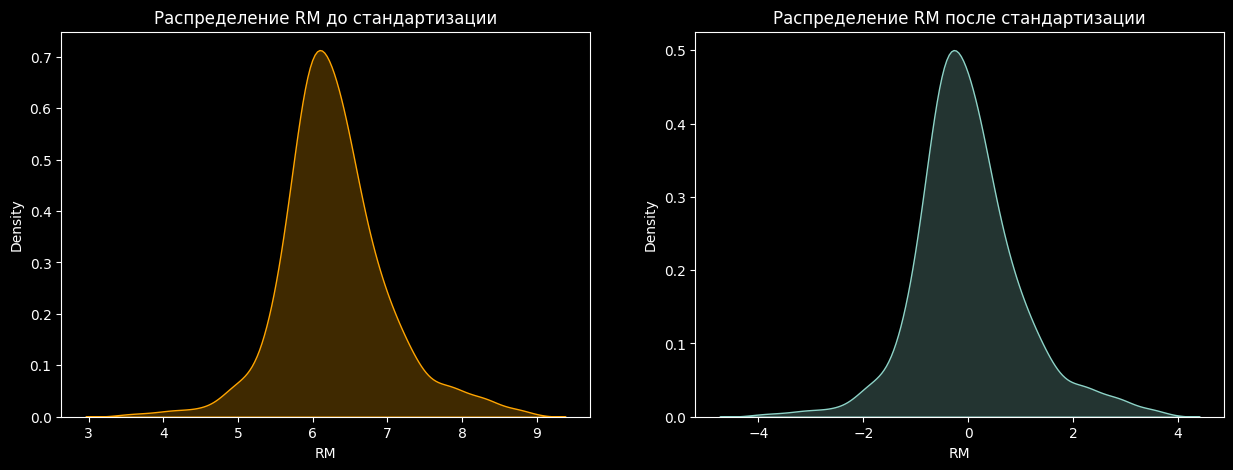

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.kdeplot(data=df, x='RM',fill=True, color='orange', ax=axes[0])
axes[0].set_title('Распределение RM до стандартизации')
sns.kdeplot(data=df_scalar, x='RM', fill=True, ax=axes[1])
axes[1].set_title('Распределение RM после стандартизации');

Можно отметить, что среднее значение сменилось с почти 6 на 0. Этот способ отлично подходит для нормальных, либо близко к нормальному распределений. 

- Нормирование

In [39]:
from sklearn.preprocessing import MinMaxScaler

# определим экземпляр класса MinMaxScaler
mm = MinMaxScaler()
df_scalar = mm.fit_transform(df.iloc[:, :-1])
# так как после MinMaxScaler получаем данные типа numpy.ndarray
# то преобразуем в DataFrame
df_scalar = pd.DataFrame(data=df_scalar, columns=df.columns[:-1])
df_scalar[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


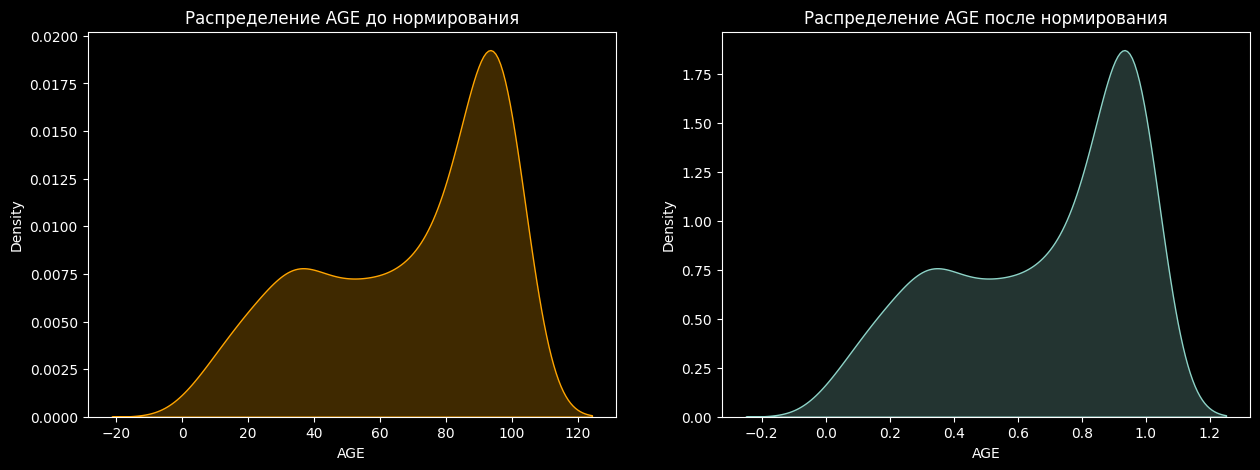

In [40]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.kdeplot(data=df, x='AGE', fill=True, color='orange', ax=axes[0])
axes[0].set_title('Распределение AGE до нормирования')
sns.kdeplot(data=df_scalar, x='AGE', fill=True, ax=axes[1])
axes[1].set_title('Распределение AGE после нормирования');

Можно отметить, что наши значения теперь распределились в промежутке от 0 до 1. 

###### Кодирование категориальных признаков

In [41]:
# создадим список с цветом стен объекта
feature_cat = ['white', 'grey', 'lightblue']
# создадим новый признак в датасете со случайными значениями из feature_cat
df['feature_cat'] = [np.random.choice(feature_cat) for _ in range(len(df))]
df[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,feature_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,lightblue
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,grey
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,lightblue
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,white
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,grey


В pandas уже есть встроенный и довольно удобный метод для бинаризации pd.get_dummies(). Если вы работаете с DataFrame, рекомендуется использовать именно данный метод. Вам достаточно просто подать на вход ваш датасет, метод автоматически распознает все категориальные признаки и сделает бинаризацию.

Для удаления первого получившегося столбца при one-hot кодировании необходимо использовать параметр drop_first, установив в нем значение True.

In [42]:
pd.get_dummies(data=df, prefix='feature_',drop_first=True)[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,feature__lightblue,feature__white
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,True,False
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,False,False
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,True,False
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,False,True
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,False,False


In [36]:
!pip install nbconvert[webpdf]

zsh:1: no matches found: nbconvert[webpdf]
